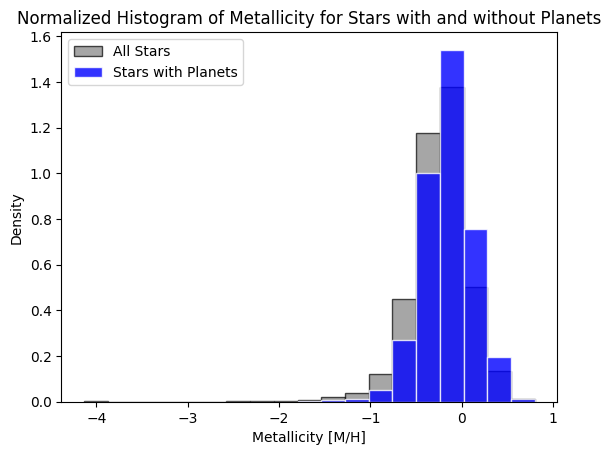

In [12]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = Table.read('Data/kepler_dr3_good.fits', format='fits')

# Filter stars with at least one confirmed planet
nconfp = data['nconfp']
filtered_data = data[nconfp > 0]

# Metallicity values for filtered data (stars with planets)
metallicity_with_planets = filtered_data['mh_gspphot']

# Metallicity values for all stars
metallicity_all_stars = data['mh_gspphot']

# Define bins for metallicity
bins = np.linspace(min(metallicity_all_stars.min(), metallicity_with_planets.min()), 
                   max(metallicity_all_stars.max(), metallicity_with_planets.max()), 20)

# Create the histogram for all stars as a background distribution, normalized
plt.hist(metallicity_all_stars, bins=bins, color='gray', alpha=0.7, label='All Stars', edgecolor='black', density=True)

# Overlay the histogram for stars with planets, also normalized
plt.hist(metallicity_with_planets, bins=bins, color='blue', alpha=0.8, label='Stars with Planets', edgecolor='white', density=True)

# Adding titles, labels and legend
plt.title('Normalized Histogram of Metallicity for Stars with and without Planets')
plt.xlabel('Metallicity [M/H]')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()
